In [1]:
# import stuff

#import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats

(30, 3)
group
ctrl    10
trt1    10
trt2    10
Name: weight, dtype: int64


Text(0.5,0.98,'')

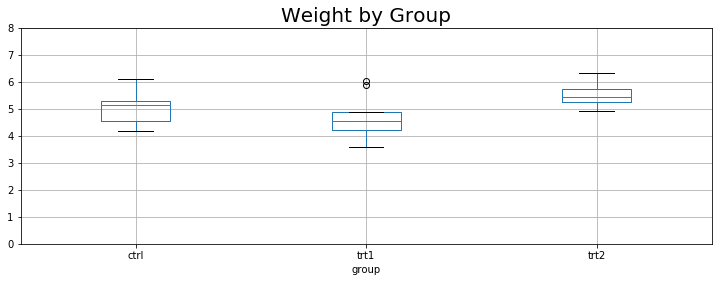

In [2]:
# load test dataset from web
data_url = 'https://vincentarelbundock.github.io/Rdatasets/csv/datasets/PlantGrowth.csv'
plants = pd.read_csv(data_url)

# print out some basic info about this dataframe
print(plants.shape)
print(plants.groupby('group')['weight'].count())

# make a boxplot by the group
fig = plt.figure()
fig.set_size_inches([12,4])
ax = fig.subplots(1)
plants.boxplot('weight', by='group', ax=ax)
ax.set_ylim([0,8])
ax.set_title('Weight by Group', fontsize=20)
plt.suptitle('')

In [3]:
grps = pd.unique(plants.group.values)
d_data = {grp:plants['weight'][plants.group == grp] for grp in grps}
 
k = len(pd.unique(plants.group))  # number of conditions
N = len(plants.values)  # conditions times participants
n = plants.groupby('group').size().values #Participants in each condition

print(n)

[10 10 10]


In [8]:
# now let's manually compute the ANOVA parameters to conduct a one-way test between the group and weight

# first, sum of squared errors of the model (SSE)
# i.e., the sum of squared differences between each point and its group mean

for i, group in enumerate(plants['group'].values):
    #print(group, i)
    plants.loc[i, 'group_mean'] = plants[plants['group'] == group].weight.values.mean()
    
SSE = 0
for grp in grps:
    SSE = SSE + sum(
        (plants[plants['group'] == grp].group_mean.values - plants[plants['group'] == grp].weight.values)**2)

print(SSE)

# now compute MSE
df_model = N - k
MSE = SSE/df_model

print(MSE)

# next, let's compute the treatment squared errors (differences between groups)
SSTr = 0
y_barbar = plants.weight.values.mean()
for i, grp in enumerate(grps):
    SSTr = SSTr + n[i]*(y_barbar - plants[plants['group'] == grp].group_mean.values[0])**2
    
#print(y_barbar)
print(SSTr)


#SSbetween = (sum(plants.groupby('group').sum()['weight']**2)/n[0]) - (plants['weight'].sum()**2)/N
#print(SSbetween)

# now compute MSTr
df_groups = k - 1
MSTr = SSTr/df_groups
print(MSTr)

#SSbetween = (sum(plants.groupby('group').sum()['weight']**2)/n[0]) - (plants['weight'].sum()**2)/N
#print(SSbetween)

10.492090000000001
0.38859592592592596
3.766340000000002
1.883170000000001


In [9]:
# now compute the F-value and the p-value using the scipy F-distribution

F = MSTr/MSE
print(F)

p = 1 - stats.f.cdf(F, df_groups, df_model)
print(p)

4.846087862380138
0.01590995832562281
